
=========== PART A — KNN ===========

K=1 Accuracy : 0.7777777777777778
K=3 Accuracy : 0.7555555555555555
K=5 Accuracy : 0.8
K=7 Accuracy : 0.7777777777777778
K=9 Accuracy : 0.8


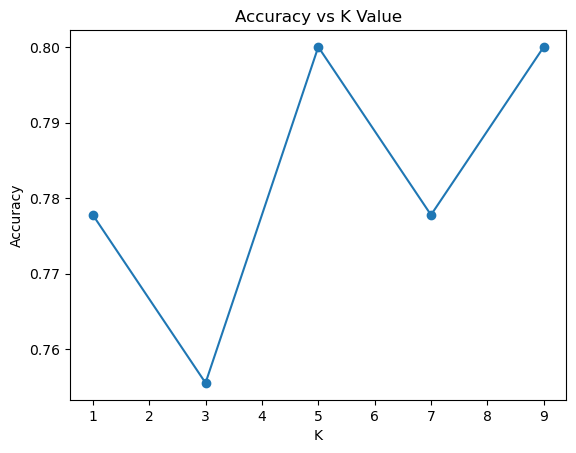


Manhattan Distance Accuracy : 0.8222222222222222


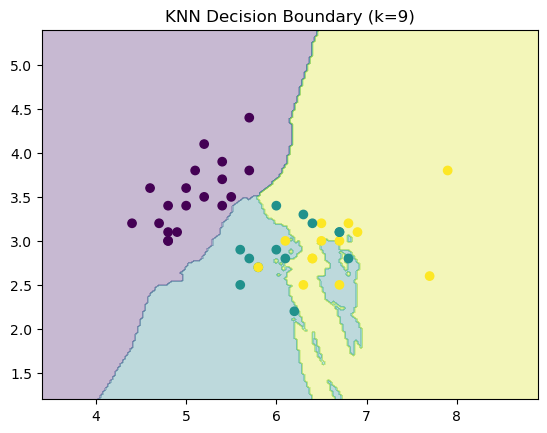


=========== PART B — NAIVE BAYES ===========

Multinomial NB Accuracy : 1.0

Probability Outputs:
[[0.10303444 0.89696556]
 [0.91685734 0.08314266]
 [0.0485735  0.9514265 ]
 [0.88026362 0.11973638]
 [0.18681999 0.81318001]
 [0.96984646 0.03015354]
 [0.0242166  0.9757834 ]
 [0.91468451 0.08531549]]

Gaussian NB Accuracy : 0.8222222222222222

=========== ALGORITHM COMPARISON ===========

KNN Accuracy : 0.8
NB Accuracy : 0.8222222222222222

Precision KNN : 0.7698412698412698
Precision NB : 0.8082788671023965

Recall KNN : 0.7692307692307692
Recall NB : 0.7948717948717948

Training+Prediction Time
KNN Time : 0.00612640380859375
NB Time : 0.0012276172637939453


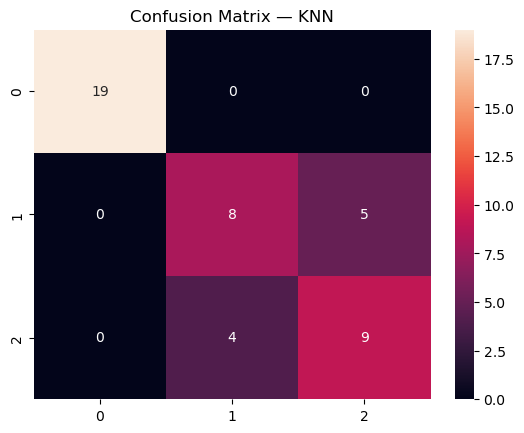


=========== WEIGHTED KNN ===========

Weighted KNN Accuracy : 0.7555555555555555

=========== BERNOULLI NB ===========

Bernoulli NB Accuracy : 1.0

=========== VOTING CLASSIFIER ===========

Voting Classifier Accuracy : 0.7777777777777778

=========== GRID SEARCH TUNING ===========

Best Parameters : {'metric': 'euclidean', 'n_neighbors': 9}
Best Accuracy : 0.7904761904761906

=========== MISCLASSIFIED INSTANCES ===========

Misclassified Samples Index : [15 16 21 26 32 36 40 41 42]

======= EXPERIMENT #6 COMPLETED SUCCESSFULLY =======


In [3]:
# ==========================================================
# EXPERIMENT #6
# KNN + NAIVE BAYES — PERFORMANCE COMPARISON
# ==========================================================

# ================= IMPORT LIBRARIES =================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import (
    GaussianNB,
    MultinomialNB,
    BernoulliNB
)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix
)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import VotingClassifier

# ==========================================================
# PART A — KNN IMPLEMENTATION
# ==========================================================

print("\n=========== PART A — KNN ===========\n")

# Load Iris Dataset
iris = load_iris()
X = iris.data[:, :2]   # 2 features for visualization
y = iris.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

# Different K values
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(
        n_neighbors=k,
        metric="euclidean"
    )
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} Accuracy :", acc)

# Accuracy vs K Graph
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

# Manhattan Distance Example
knn_manhattan = KNeighborsClassifier(
    n_neighbors=5,
    metric="manhattan"
)
knn_manhattan.fit(X_train, y_train)
print("\nManhattan Distance Accuracy :",
      knn_manhattan.score(X_test, y_test))

# Decision Boundary Function
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title(title)
    plt.show()

plot_decision_boundary(
    knn, X_test, y_test,
    "KNN Decision Boundary (k=9)"
)

# ==========================================================
# PART B — NAIVE BAYES
# ==========================================================

print("\n=========== PART B — NAIVE BAYES ===========\n")

# -------- SMS Spam Sample Dataset --------
texts = [
    "Win money now",
    "Call me today",
    "Free prize claim",
    "Lets meet tomorrow",
    "Congratulations you won",
    "Are we meeting today",
    "Claim your free reward",
    "Hello how are you"
]

labels = [1,0,1,0,1,0,1,0]   # 1=Spam, 0=Ham

# Text Vectorization
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(texts)

# Train Multinomial NB
mnb = MultinomialNB(alpha=1.0)   # Laplace smoothing
mnb.fit(X_text, labels)

# Predictions
pred = mnb.predict(X_text)
prob = mnb.predict_proba(X_text)

print("Multinomial NB Accuracy :",
      accuracy_score(labels, pred))

print("\nProbability Outputs:")
print(prob)

# -------- Gaussian NB on Numerical Data --------
gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_pred = gnb.predict(X_test)

print("\nGaussian NB Accuracy :",
      accuracy_score(y_test, gnb_pred))

# ==========================================================
# PART C — COMPARISON
# ==========================================================

print("\n=========== ALGORITHM COMPARISON ===========\n")

# KNN Timing
start = time.time()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_time = time.time() - start

# NB Timing
start = time.time()
gnb.fit(X_train, y_train)
nb_pred = gnb.predict(X_test)
nb_time = time.time() - start

print("KNN Accuracy :", accuracy_score(y_test, knn_pred))
print("NB Accuracy :", accuracy_score(y_test, nb_pred))

print("\nPrecision KNN :",
      precision_score(y_test, knn_pred, average="macro"))
print("Precision NB :",
      precision_score(y_test, nb_pred, average="macro"))

print("\nRecall KNN :",
      recall_score(y_test, knn_pred, average="macro"))
print("Recall NB :",
      recall_score(y_test, nb_pred, average="macro"))

print("\nTraining+Prediction Time")
print("KNN Time :", knn_time)
print("NB Time :", nb_time)

# Confusion Matrix
cm = confusion_matrix(y_test, knn_pred)

sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix — KNN")
plt.show()

# ==========================================================
# POST-LAB EXTENSIONS
# ==========================================================

print("\n=========== WEIGHTED KNN ===========\n")

weighted_knn = KNeighborsClassifier(
    n_neighbors=5,
    weights="distance"
)
weighted_knn.fit(X_train, y_train)
print("Weighted KNN Accuracy :",
      weighted_knn.score(X_test, y_test))

# ==========================================================

print("\n=========== BERNOULLI NB ===========\n")

bnb = BernoulliNB()
bnb.fit(X_text, labels)

print("Bernoulli NB Accuracy :",
      accuracy_score(labels, bnb.predict(X_text)))

# ==========================================================

print("\n=========== VOTING CLASSIFIER ===========\n")

voting = VotingClassifier(
    estimators=[
        ("knn", knn),
        ("nb", gnb)
    ],
    voting="hard"
)

voting.fit(X_train, y_train)
print("Voting Classifier Accuracy :",
      voting.score(X_test, y_test))

# ==========================================================

print("\n=========== GRID SEARCH TUNING ===========\n")

param_grid = {
    "n_neighbors": [1,3,5,7,9],
    "metric": ["euclidean", "manhattan"]
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5
)

grid.fit(X_train, y_train)

print("Best Parameters :", grid.best_params_)
print("Best Accuracy :", grid.best_score_)

# ==========================================================

print("\n=========== MISCLASSIFIED INSTANCES ===========\n")

mis_idx = np.where(y_test != knn_pred)[0]

print("Misclassified Samples Index :", mis_idx)

# ==========================================================
print("\n======= EXPERIMENT #6 COMPLETED SUCCESSFULLY =======")
